This is code to plot the fraction of cells in with time Date:Jan 13, 2024



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


         0      1     2     3
0     12.0    0.0   0.0   0.0
1      5.0    0.0   0.0   0.0
2      7.0    0.0   0.0   0.0
3      5.0    0.0   0.0   0.0
4      4.0    0.0   0.0   0.0
..     ...    ...   ...   ...
162  199.0  125.0  47.0  11.0
163  179.0  104.0  44.0  19.0
164  206.0  111.0  47.0  12.0
165  200.0   95.0  41.0  11.0
166  174.0   95.0  51.0   7.0

[167 rows x 4 columns]
<class 'numpy.ndarray'>
[ 12.   5.   7.   5.   4.   6.   8.   4. 203.   6.   5. 205. 205. 203.
 203. 204. 206.  10. 203. 203. 203. 206.   4. 203. 203. 203. 204.   6.
 204. 203. 203. 203. 203. 205. 206. 204. 204. 204. 205. 203. 203. 203.
 206. 204. 204. 209. 216. 203. 203. 211. 205. 219. 204. 209. 209. 205.
 205. 215. 203. 205. 214. 208. 220. 206. 216. 207. 217. 205. 203. 224.
 210. 233. 215. 227. 211. 203. 248. 205. 203. 214. 231. 237. 244. 216.
 217. 210. 245. 227. 208. 215. 203. 269. 255. 214. 208. 203. 266. 223.
 309. 238. 247. 226. 252. 225. 213. 231. 234. 254. 230. 258. 309. 248.
 323. 207. 361. 347. 327

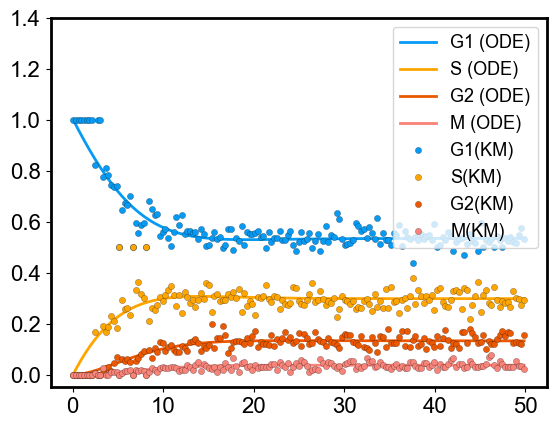

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#ODE part
# Define the system of differential equations
def model(y, t, k1,k2,k3,k4):
    rho1, rho2, rho3, rho4 = y  # Unpack variables
    drho1_dt = -(k1 * rho1)+(k4*rho4*(2-rho1))  
    drho2_dt = (k1 * rho1)-rho2*(k2+k4*rho4)
    drho3_dt = (k2 * rho2)-rho3*(k3+k4*rho4) 
    drho4_dt = (k3 * rho3)-rho4*(k4+k4*rho4) 
    return [drho1_dt, drho2_dt, drho3_dt, drho4_dt]  # Return the derivatives

k1=.07
k2=.1
k3=.2
k4=.7
#initial conditions rho1=1 at t=0
y0=[1,0,0,0]
times=np.arange(0.05,50.0,0.3)
# Solve the ODE system
solution = odeint(model, y0, times, args=(k1,k2,k3,k4))
# Extract the solutions for rho1, rho2, rho3, rho4
rho1, rho2, rho3, rho4 = solution.T

#This is the Gillespie part
#cell_levels=pd.read_csv('cell_levels_S10x.txt',delimiter='\t', header= None)
cell_levels=pd.read_csv('cell_levels_constant_rate.txt',delimiter='\t', header= None)
print(cell_levels)
cell_levels=np.asarray(cell_levels)
print(type(cell_levels))
cells_tot=np.sum(cell_levels,1)
print(cells_tot)

cell_levels_normalized = cell_levels / cells_tot[:, np.newaxis]  # Normalize cell_levels by cells_tot
print(cell_levels_normalized)


# Customize the font of the legend
plt.legend(fontsize=13, prop={'family': 'arial'})


# Set the width of the x and y axes (spines)
ax = plt.gca()
axes_width_size=2
ax.spines['bottom'].set_linewidth(axes_width_size)
ax.spines['left'].set_linewidth(axes_width_size)
ax.spines['top'].set_linewidth(axes_width_size)  # Optional: set top spine width to 0 if not needed
ax.spines['right'].set_linewidth(axes_width_size) 


# Set global font settings
plt.rcParams.update({
    'font.family': 'Arial',  # Use Arial font
    'font.size': 13,         # Default font size
    'axes.labelsize': 16,    # Size of axis labels
    'xtick.labelsize': 16,   # Size of x-tick labels
    'ytick.labelsize': 16,   # Size of y-tick labels
})


colors = ['#069AF3', 'orange', '#EC5800', '#F88379']
# ODE plots with markers
plt.plot(times, rho1, color=colors[0], linewidth=2, label='G1 (ODE)')
plt.plot(times, rho2, color=colors[1], linewidth=2, label='S (ODE)')
plt.plot(times, rho3, color=colors[2], linewidth=2,  label='G2 (ODE)')
plt.plot(times, rho4, color=colors[3], linewidth=2,  label='M (ODE)')

# Define some parameters for Gillespie plot 
q = 0.15  # Marker edge width
point_size = 4.5  # Adjust the marker size as needed

# Assuming 'times' is already defined
labels=['G1(KM)','S(KM)','G2(KM)','M(KM)']
# Loop through each column in 'cell_levels_normalized' and plot with the desired style
for i in range(cell_levels_normalized.shape[1]):  # Loop through each column
    plt.plot(times, cell_levels_normalized[:, i], 
             label=labels[i],  # Label with index
             color=colors[i % len(colors)],  # Cycle through colors if there are more columns than colors
             linestyle='',  # No line, only markers
             marker='o',  # Marker style (circle)
             markersize=point_size,  # Marker size
             markeredgecolor='black',  # Black edge for markers
             markeredgewidth=q)  # Marker edge width
    

# Set y-axis limits (e.g., from 0 to 1.2)
plt.ylim(-0.05, 1.4)

# Set legend in the top-right corner
plt.legend(loc='upper right')
# Customize the font of the legend
plt.legend(fontsize=13, prop={'family': 'Arial'})
# plt.xlabel('Time')
# plt.ylabel('Normalized Cell Fraction')
# plt.title('Normalized Cell Fractions Over Time')


plt.legend()
plt.show()